In [1]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# Load the Boston dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# Add the target variable (label)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Set the features and label
X = pd.DataFrame(np.c_[df['AGE'], df['RM']], columns = ['AGE','RM'])
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 2) (102, 2) (404,) (102,)


In [4]:
X['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

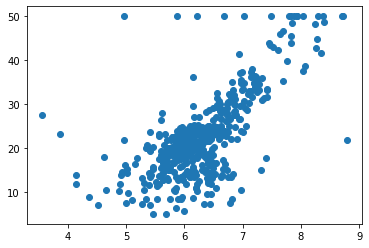

In [5]:
# Plot the features
plt.scatter(X['RM'], y)

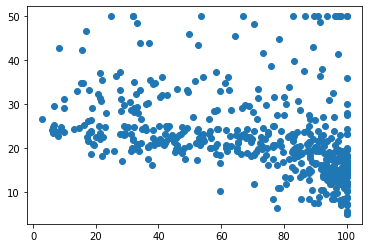

In [6]:
plt.scatter(X['AGE'], y)

In [7]:
# Fit the regressor
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)

In [8]:
print('Coefficient of determination:', model.score(X, y))
print('Intercept:', model.intercept_)
print('slope:', model.coef_)

Coefficient of determination: 0.529269171356878
Intercept: -28.203538066489102
slope: [-0.06640957  8.7957305 ]


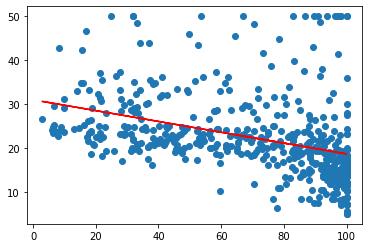

In [9]:
# Age regression line
plt.plot(X['AGE'], y, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X['AGE'], y, 1)
plt.plot(X['AGE'], model.coef_[0]*X['AGE']+model.intercept_, color='red')

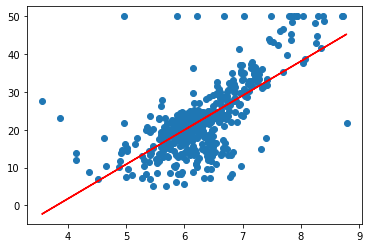

In [10]:
# Room number regression line
plt.plot(X['RM'], y, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X['RM'], y, 1)
plt.plot(X['RM'], model.coef_[0]*X['RM']+model.intercept_, color='red')

In [11]:
y_test_predict = regressor.predict(X_test)
print('predicted response:', y_test_predict, sep='\n')

predicted response:
[787.25015146 324.23031145 917.24260217  89.67193479 856.28969868
 698.66489016 774.64279666 871.59162    845.67926913 743.77933277
 871.45059389 800.01010665 915.28818349 508.92762402 691.82210624
 642.02614527 889.02151926 918.4634422  325.86324434 918.10912884
 168.57911396 314.52100265 872.08784272 652.27536104 885.58752254
 881.40500548 350.13268892 881.01550919 856.0561702  658.90073584
 819.87583443 497.89104316 920.74902566 888.11497018 878.27944816
 912.10193932 584.66556165 438.37916738 556.60132979  76.69179191
 676.28211137 665.44959882 326.35155459 349.49030617 623.42098553
 898.48395877 880.17419204  81.84550115 784.14980366 616.61881286
 772.74775836 365.21648348 854.01614956 673.95359813 509.8044185
 493.24748629 930.24092535 279.62572679 458.42653251 653.59749918
 419.83763868 228.42581634 217.74413769 346.45607357 349.96220264
 922.54466116 921.53491866 313.84798206 221.76319769 817.96804416
 319.32170499 706.44852282 896.08331318 195.03196063 436.

In [12]:
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print(rmse)

676.5903849174067


Task 1

What do our features mean?

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

This can be obtain via the boston.DESCR command

In [13]:
#boston.DESCR

In [14]:
# Set the features and label
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Fit the regressor
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)

print('Coefficient of determination:', model.score(X, y))
print('Intercept:', model.intercept_)
print('slope:', model.coef_)

(404, 2) (102, 2) (404,) (102,)
Coefficient of determination: 0.6379572481839603
Intercept: -3.841177079004897
slope: [-0.63249856  5.46509877]


In [15]:
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print(rmse)

5.589569804715174


Task 2

In [16]:
# Set the features and label
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['CRIM'], df['TAX']], columns = ['LSTAT','RM','CRIM','TAX'])
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Fit the regressor
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)

print('Coefficient of determination:', model.score(X, y))
print('Intercept:', model.intercept_)
print('slope:', model.coef_)

(404, 4) (102, 4) (404,) (102,)
Coefficient of determination: 0.6495569651575734
Intercept: -4.149810167133371
slope: [-5.20585862e-01  5.63360387e+00 -8.77267717e-02 -4.53712818e-03]


In [17]:
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print(rmse)

5.6217921875770935
